# Plik został stworzony na potrzeby nauki języka Python oraz obsługi bibliotek takich jak: Pandas, NumPy, Matplolib, Seaborn, SciPy itp..


## Zacznijmy najpierw od Pandas

In [81]:
# zaimportuje teraz biblioteke która umozliwi mi dostep do danych
import seaborn as sns
import pandas as pd
import numpy as np
import inspect
import matplotlib.pyplot as plt

In [3]:
dataset_names = sns.get_dataset_names()
print(dataset_names)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic', 'anagrams', 'anagrams', 'anscombe', 'anscombe', 'attention', 'attention', 'brain_networks', 'brain_networks', 'car_crashes', 'car_crashes', 'diamonds', 'diamonds', 'dots', 'dots', 'dowjones', 'dowjones', 'exercise', 'exercise', 'flights', 'flights', 'fmri', 'fmri', 'geyser', 'geyser', 'glue', 'glue', 'healthexp', 'healthexp', 'iris', 'iris', 'mpg', 'mpg', 'penguins', 'penguins', 'planets', 'planets', 'seaice', 'seaice', 'taxis', 'taxis', 'tips', 'tips', 'titanic', 'titanic', 'anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
# Załaduj zestaw danych 'ircar_crashes'
df = sns.load_dataset('car_crashes')

# Wyświetl pierwsze 5 wierszy
print(df.head())

# Wyświetl informacje o zestawie danych
print(df.info())

In [16]:
#seria
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

#dataframe
dates = pd.date_range("20130101", periods=6)
dates

df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

#df z dictionary
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",                                                     #foo is used as a place-holder name
    }
)
df2

df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### Pokazywanie danych

In [65]:
# Załaduj zestaw danych 'iris'
df = sns.load_dataset('iris')
df_head = df.head()

# Stylizuj tabelę z obwódkami wokół komórek
styled_df_head = df_head.style.set_table_styles(
    [{'selector': 'td, th', 'props': [('border', '1px solid black')]}]
)

# Wyświetl stylizowaną tabelę
styled_df_head

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100000,3.500000,1.400000,0.200000,setosa
1,4.900000,3.000000,1.400000,0.200000,setosa
2,4.700000,3.200000,1.300000,0.200000,setosa
3,4.600000,3.100000,1.500000,0.200000,setosa
4,5.000000,3.600000,1.400000,0.200000,setosa


In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [25]:
df.index  # indeks to jest pierwsza kolumna która jest tak jakby kolumna zerowa i na niej można sobei zliczać rekordy, każdy indeks jest oryginalny

RangeIndex(start=0, stop=150, step=1)

In [27]:
df.to_numpy()
df.describe()  #podsumowanie statystyczne baardzo przydatne!!

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
df.sort_index(axis=1, ascending=False)  #sortuje indeksy 

,species,sepal_width,sepal_length,petal_width,petal_length
0,setosa,3.5,5.1,0.2,1.4
1,setosa,3.0,4.9,0.2,1.4
2,setosa,3.2,4.7,0.2,1.3
3,setosa,3.1,4.6,0.2,1.5
4,setosa,3.6,5.0,0.2,1.4
...,...,...,...,...,...
145,virginica,3.0,6.7,2.3,5.2
146,virginica,2.5,6.3,1.9,5.0
147,virginica,3.0,6.5,2.0,5.2
148,virginica,3.4,6.2,2.3,5.4


In [33]:
df.sort_values(by="sepal_length")  # sortuje wdg wartości

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica


In [34]:
df["species"]  # przekazuje pojedynczą kolumne

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [38]:
df[0:3]  #trzy pierwsze wiersze

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [40]:
df[1:8]  #po indeksie(czsami indeks to może byc data) od 1 do 8

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


In [48]:
df_more_than_3 = df.loc[df['petal_length']> 3.0]
df_more_than_3.sort_values(by = "petal_length")

,sepal_length,sepal_width,petal_length,petal_width,species
93,5.0,2.3,3.3,1.0,versicolor
57,4.9,2.4,3.3,1.0,versicolor
79,5.7,2.6,3.5,1.0,versicolor
60,5.0,2.0,3.5,1.0,versicolor
64,5.6,2.9,3.6,1.3,versicolor
...,...,...,...,...,...
131,7.9,3.8,6.4,2.0,virginica
105,7.6,3.0,6.6,2.1,virginica
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica


In [5]:
df.loc[:, ["sepal_length", "petal_width"]]  # : --> wszytke wiersze

,sepal_length,petal_width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


In [84]:
df.loc[100, 'species']  # setny wiersz i wartoś w kolumnie secies
df.iloc[3]  # 3 wiersz i wartość wszystkiego
df.iloc[0:5, 0:2] # 3 i 4 wiersz i 0 i 1 kolumna indeks sie nie liczy- jest wyświetlany zawsze
df.iloc[[1, 20, 140], [0, 2]] #konkretne wybrane wiersze i kolumny
df.iat[1, 1]
df[df["sepal_length"] > 6.5]  # operacja w pierwszym nawiasie daje true i fase


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica


In [89]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1
df["F"] = s1
df.drop('F', axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
df.loc[:, "D"] = np.array([5] * len(df))  #doda nową kolumne bo wczesniej nie było D i wypełni ją piątkami
df

,sepal_length,sepal_width,petal_length,petal_width,species,D
0,5.1,3.5,1.4,0.2,setosa,5
1,4.9,3.0,1.4,0.2,setosa,5
2,4.7,3.2,1.3,0.2,setosa,5
3,4.6,3.1,1.5,0.2,setosa,5
4,5.0,3.6,1.4,0.2,setosa,5
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,5
146,6.3,2.5,5.0,1.9,virginica,5
147,6.5,3.0,5.2,2.0,virginica,5
148,6.2,3.4,5.4,2.3,virginica,5


In [23]:
df2 = df.copy()
df2
# df2.drop('D', axis=1)   #usuwanie kolumn
del df2['D']
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Operacje z parametrem inplace=True w Pandas pozwalają na modyfikację oryginalnego obiektu bez tworzenia nowego. To jest przydatne, gdy chcemy zaoszczędzić pamięć lub uniknąć przypisywania wyników operacji do nowych zmiennych. Pamiętaj, że użycie inplace=True zmienia oryginalny DataFrame lub Series, co może nie być pożądane, jeśli chcesz zachować oryginalne dane.

## Braki w danyh

In [35]:
df1 = df.reindex(index=range(5), columns=list(df.columns) + ["F"])
df1
#df1.dropna(how="any")  # usuwa wszytkie wiersze z NaN
df1.fillna(value=5)
df1

,sepal_length,sepal_width,petal_length,petal_width,species,D,F
0,5.1,3.5,1.4,0.2,setosa,5,NaN
1,4.9,3.0,1.4,0.2,setosa,5,NaN
2,4.7,3.2,1.3,0.2,setosa,5,NaN
3,4.6,3.1,1.5,0.2,setosa,5,NaN
4,5.0,3.6,1.4,0.2,setosa,5,NaN


In [36]:
pd.isna(df1)

,sepal_length,sepal_width,petal_length,petal_width,species,D,F
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,True


# Statystyki

In [37]:
df.mean()   #fajniejsze jest describe

C:\Users\Admin\AppData\Local\Temp\ipykernel_12728\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
D               5.000000
dtype: float64

In [43]:
# Definiowanie funkcji lambda
func = lambda x: np.mean(x) * 5.6

# Stosowanie funkcji lambda do wybranych kolumn
result = df.agg({
    'sepal_length': func,
    'sepal_width': func
})

print(result)

#df.agg(lambda x: np.mean(x) * 5.6) to sie nie sprawdza bo nie wszytkie kolumny sa typu liczbowego
#df.dtypes

     sepal_length  sepal_width
0           28.56        19.60
1           27.44        16.80
2           26.32        17.92
3           25.76        17.36
4           28.00        20.16
..            ...          ...
145         37.52        16.80
146         35.28        14.00
147         36.40        16.80
148         34.72        19.04
149         33.04        16.80

[150 rows x 2 columns]


In [45]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    3
2    4
3    1
4    3
5    2
6    4
7    0
8    6
9    3
dtype: int32

In [47]:
s = np.random.randint(1, 3, size=11)
s

array([2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2])

> Series:

* Należy do biblioteki Pandas.
* Jest to jednowymiarowa struktura danych, która przypomina kolumnę w tabeli.
* Może zawierać różne typy danych (np. liczby, tekst, daty) i ma przypisane etykiety (indeksy), co ułatwia manipulację danymi.
* Oferuje wiele funkcji do manipulacji danymi, analizy i operacji statystycznych.

> array:

* Należy do biblioteki NumPy.
* Jest to jednowymiarowa struktura danych (choć NumPy obsługuje również wielowymiarowe tablice).
* Typ danych w tablicy jest jednorodny, co oznacza, że wszystkie elementy muszą być tego samego typu.
* Głównie używana do operacji numerycznych i matematycznych.

Wydajność

> Series:

Może być mniej wydajna niż NumPy array w operacjach matematycznych, ze względu na dodatkowe funkcjonalności związane z etykietami i zarządzaniem danymi.

> array:

Jest zazwyczaj bardziej wydajna do obliczeń matematycznych, ponieważ jest zoptymalizowana do operacji na liczbach i nie zawiera dodatkowych struktur danych.

In [50]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", 1, "cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7       1
8     cat
dtype: object

In [52]:
d1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
d2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Łączenie DataFrames wzdłuż osi 0 (domyślnie)
result = pd.concat([d1, d2])
result

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


In [57]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

print(left)
print(right)

pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grupowanie

In [58]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-1.861913,-0.380495
1,bar,one,0.729319,2.452493
2,foo,two,-1.165889,0.843541
3,bar,three,-0.739700,-1.106143
4,foo,two,2.166446,-1.148659
5,bar,two,1.878222,0.593315
6,foo,one,-0.479646,-0.032848
7,foo,three,-0.662853,1.037903


In [64]:
df.groupby("A")[["C", "D"]].sum()   # wytłumaczenie jest takie że daje sie podwójne nawiasy ponieważ pojedynczy traktowany jest jako krotka

,C,D
A,,
bar,1.867841,1.939665
foo,-2.003855,0.319442


In [68]:
df.groupby("species")[["petal_length", "petal_width"]].sum()

,petal_length,petal_width
species,,
setosa,73.1,12.3
versicolor,213.0,66.3
virginica,277.6,101.3


In [84]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
print(index)
tab = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["rand1", "rand2"])
tab2 = tab[:4]
tab2

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])


rand1     rand2
first second                    
bar   one     1.462970  1.464431
      two    -0.878353 -0.588512
baz   one     2.106779  1.324066
      two    -1.113419  0.974505

In [89]:
stacked = tab2.stack()
stacked

first  second       
bar    one     rand1    1.462970
               rand2    1.464431
       two     rand1   -0.878353
               rand2   -0.588512
baz    one     rand1    2.106779
               rand2    1.324066
       two     rand1   -1.113419
               rand2    0.974505
dtype: float64

In [90]:
stacked.unstack()

rand1     rand2
first second                    
bar   one     1.462970  1.464431
      two    -0.878353 -0.588512
baz   one     2.106779  1.324066
      two    -1.113419  0.974505

In [91]:
stacked.unstack(1)

second            one       two
first                          
bar   rand1  1.462970 -0.878353
      rand2  1.464431 -0.588512
baz   rand1  2.106779 -1.113419
      rand2  1.324066  0.974505

## Pivot tables

In [3]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.219032,0.961172
1,one,B,foo,-0.910952,0.734147
2,two,C,foo,-0.947408,-0.545145
3,three,A,bar,1.850259,0.530274
4,one,B,bar,1.328073,-0.577332
5,one,C,bar,0.105221,1.101211
6,two,A,foo,2.085611,0.814768
7,three,B,foo,-0.366252,-0.384447
8,one,C,foo,-1.311283,-0.128100
9,one,A,bar,-0.420196,-0.934107


In [ ]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

In [9]:
rng = pd.date_range("10/11/2023", periods=20, freq="m")  #parametr freq moze mieć różne kombinacjer jak np. 2W CZYLI CO DWA TYG LUB 5D CZYLI CO 5
rng

DatetimeIndex(['2023-10-31', '2023-11-30', '2023-12-31', '2024-01-31',
               '2024-02-29', '2024-03-31', '2024-04-30', '2024-05-31',
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31', '2025-04-30', '2025-05-31'],
              dtype='datetime64[ns]', freq='M')

In [14]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2023-10-31    392
2023-11-30    207
2023-12-31    322
2024-01-31     97
2024-02-29    137
2024-03-31    255
2024-04-30     86
2024-05-31     52
2024-06-30    195
2024-07-31    109
2024-08-31    292
2024-09-30    327
2024-10-31    152
2024-11-30    246
2024-12-31    286
2025-01-31    400
2025-02-28    415
2025-03-31    457
2025-04-30    409
2025-05-31    367
Freq: M, dtype: int32

In [25]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["e", "b", "c", "a", "a", None]}
)

df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0      e
1      b
2      c
3      a
4      a
5    NaN
Name: grade, dtype: category
Categories (4, object): ['a', 'b', 'c', 'e']

In [27]:
new_categories = ["very good", "good", "bad", "very bad"]

df["grade"] = df["grade"].cat.rename_categories(new_categories)
df["grade"]

0     very bad
1         good
2          bad
3    very good
4    very good
5          NaN
Name: grade, dtype: category
Categories (4, object): ['very good', 'good', 'bad', 'very bad']

In [32]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,e,very bad
2,3,c,bad
1,2,b,good
3,4,a,very good
4,5,a,very good
5,6,None,NaN


In [33]:
df.groupby("grade", observed=False).size()

grade
very bad     1
bad          1
medium       0
good         1
very good    2
dtype: int64

## Wykresy

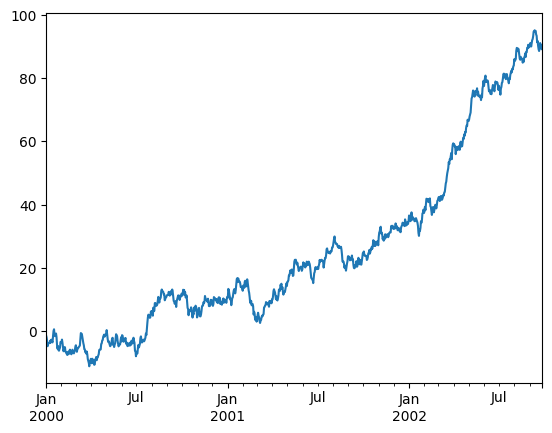

In [44]:
plt.close("all")
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()
ts.plot();

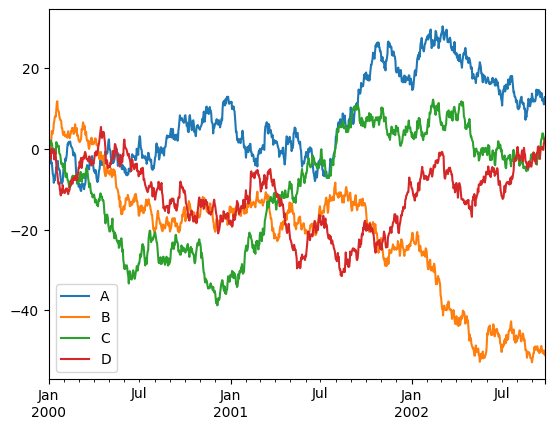

In [58]:
df = pd.DataFrame(np.random.randn(1000, 4), index = ts.index, columns=["A", "B", "C", "D"])

df = df.cumsum();
#plt.figure();

df.plot();

plt.legend(loc='best');

In [64]:
df = pd.DataFrame(np.random.uniform(0, 5, (10, 5)))
df

# df.to_csv("foo.csv")

,0,1,2,3,4
0,0.847465,4.051139,3.414037,3.197802,3.073869
1,1.459573,2.156445,2.392760,3.874867,1.868718
2,2.522465,0.115954,4.413006,1.052690,3.907997
3,0.645492,0.113336,3.459183,2.639335,4.568328
4,2.195767,2.048706,2.637477,2.350399,0.007349
5,4.358876,0.010632,3.501698,1.942220,4.587663
6,4.585689,0.003704,4.019715,1.433735,1.306428
7,2.265476,3.820501,0.655672,4.240650,4.705011
8,3.296249,2.094044,2.240605,2.979586,4.755327
9,2.099157,4.886205,3.493249,1.350269,4.901439


In [73]:
d1 = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])



a    0.415859
b    0.419231
c    1.625972
d    2.208046
e   -0.092748
dtype: float64 

b    0.349435
a    0.772879
a   -0.374899
b   -0.442803
e   -1.238171
dtype: float64 

a    1.188738
a    0.040960
b    0.768666
b   -0.023572
c         NaN
d         NaN
e   -1.330919
dtype: float64
a    1.188738
a    0.040960
b    0.768666
b   -0.023572
c         NaN
d         NaN
e   -1.330919
dtype: float64


In [80]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data  # b'' oznacza pusty ciąg bajtow

data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


## Nametuples

In [85]:
from collections import namedtuple

In [91]:
Point = namedtuple("Point", "x y")
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 8)])

,x,y
0,0,0
1,0,3
2,2,8


In [110]:
# tworze sobie dictionary
dict = {'a': 'ola', 'b': 'ala'}
dict
#lub 
empty_dict={}
empty_dict["name"] = "Ola"
empty_dict["surname"] = "Manola"
empty_dict["age"] = 30
empty_dict["sex"] = 'woman'
print(empty_dict)
#lub
del dict
my_dict = dict(name=['John', 'Mikel'], age=[30, 40], city=['New York', 'las vegas'])
print(my_dict)
df11 = pd.DataFrame(my_dict) # jesli jest skalar trzeba podac wartos parametru index
df11



{'name': 'Ola', 'surname': 'Manola', 'age': 30, 'sex': 'woman'}
{'name': ['John', 'Mikel'], 'age': [30, 40], 'city': ['New York', 'las vegas']}


,name,age,city
0,John,30,New York
1,Mikel,40,las vegas
